# Perform data cleaning and exploratory data analysis (EDA) on dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify pattern and trends in the data
Use following data: https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("/content/drive/MyDrive/PRODIGY Internship/PRODIGY_DS_02/TitanicData.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-4-c62d575fcade>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-c62d575fcade>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [5]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

##Survival Count (Histogram)
This chart shows how many passengers survived (Survived = 1) vs. those who did not (Survived = 0).

🔍 Insight: The majority of passengers did not survive, indicating a high fatality rate in the disaster.


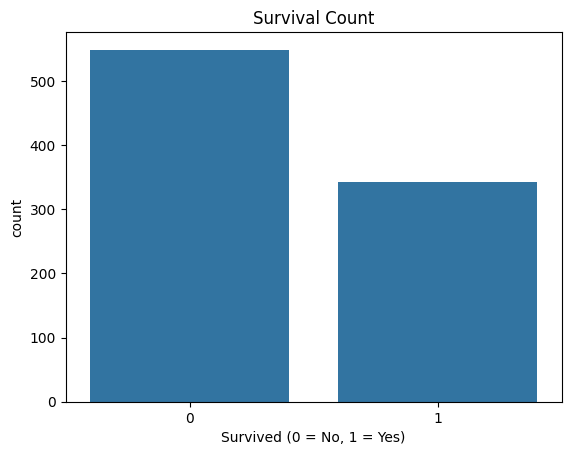

In [7]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

## Survival by Gender (Grouped Histogram (Bar Chart))
This chart compares male and female survival rates.

🔍 Insight: A significantly higher number of females survived compared to males, likely due to the "women and children first" evacuation rule.

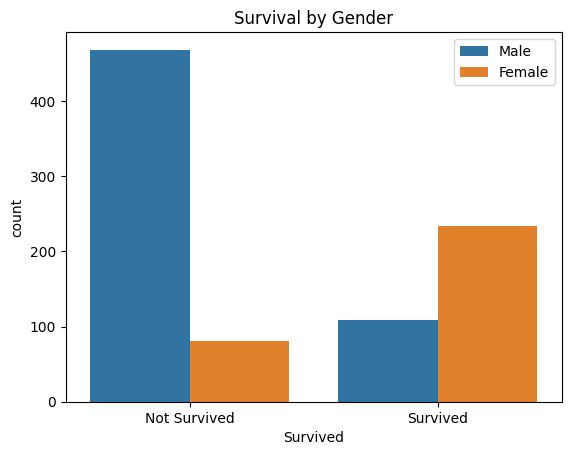

In [8]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(['Male', 'Female'])
plt.show()

## Survival by Passenger Class (Grouped Histogram)
Displays survival based on passenger class: 1st, 2nd, and 3rd.

🔍 Insight: Passengers in 1st class had much higher survival rates, highlighting the class-based priority during evacuation.

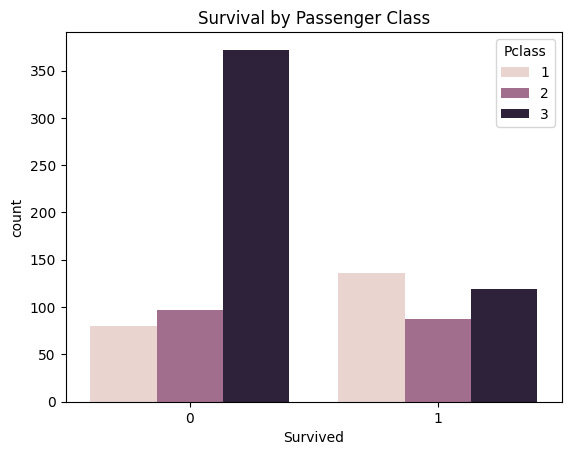

In [9]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Passenger Class')
plt.show()

## Age Distribution of Passengers (Histogram)
This chart shows the age distribution across all passengers.

🔍 Insight: Most passengers were between 20 to 40 years old, with a small number of infants and elderly travelers.

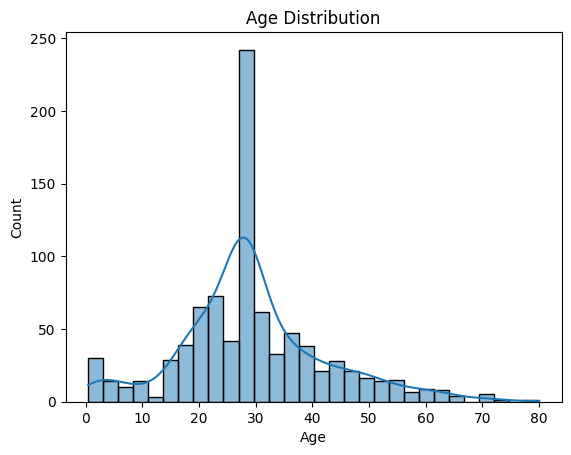

In [10]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

## Age vs. Survival (Boxplot)
Shows the age range of passengers who survived vs. those who didn’t.

🔍 Insight: Survivors tend to be slightly younger on average. Some very young children had a better survival rate.

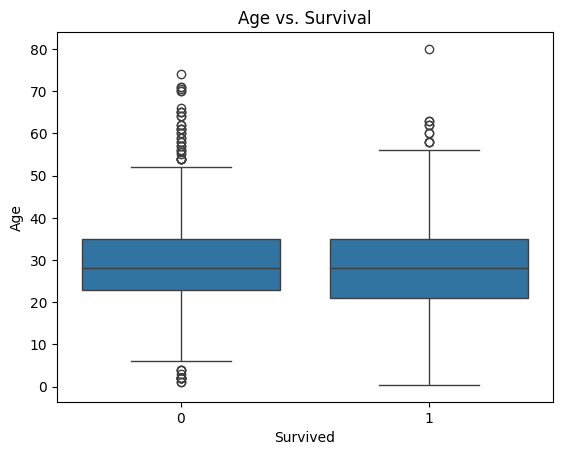

In [11]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs. Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

## Correlation Heatmap
This heatmap shows correlation coefficients between all numerical features.

🔍 Insight:

Sex (female = 1) and Survived are positively correlated.

Pclass is negatively correlated with survival (lower class → lower survival).

Fare has a positive correlation with survival.

Age has a slight negative correlation, suggesting younger passengers had better outcomes.

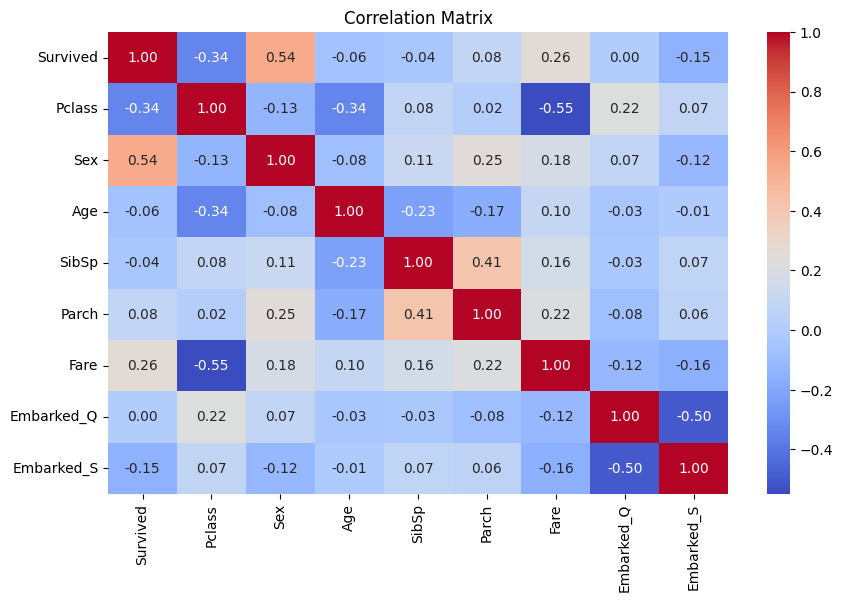

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

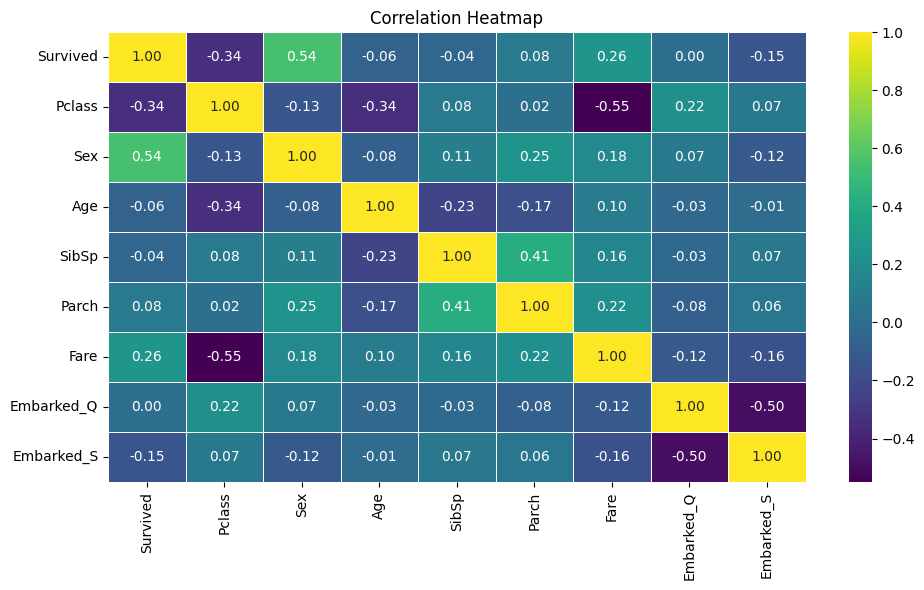

In [18]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

## Fare vs. Age colored by Survival (Scatter Plot)
Visualizes how ticket price (Fare) and age relate to survival.

🔍 Insight: Passengers who paid higher fares (typically 1st class) had better survival chances. Most high-fare survivors are clustered under age 50.

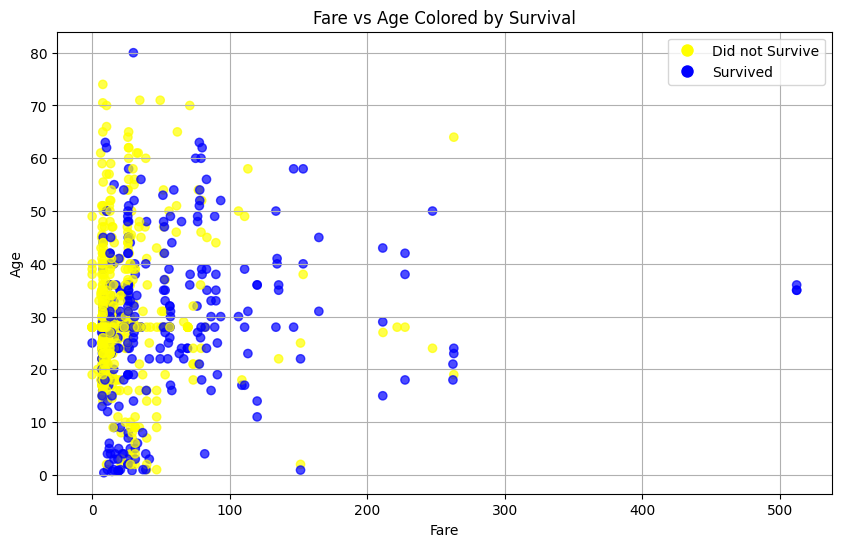

In [17]:
import matplotlib.pyplot as plt

# Create color mapping for survival
colors = df['Survived'].map({0: 'yellow', 1: 'blue'})

# Set up the plot
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(df['Fare'], df['Age'],
                      c=colors,
                      alpha=0.7,
                      label=None)

# Titles and labels
plt.title('Fare vs Age Colored by Survival')
plt.xlabel('Fare')
plt.ylabel('Age')

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Did not Survive', markerfacecolor='yellow', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Survived', markerfacecolor='blue', markersize=10)
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True)
plt.show()
